In [153]:
# importing necessary packages
import warnings
warnings.filterwarnings('ignore')

# import pandas and numpy
import pandas as pd
#increase max row and column display value
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 1000)

import numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
# reading data dictionary
data_dictionary = pd.read_csv('data_dictionary.csv')
data_dictionary.head(100)

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


# Reading and understanding the data

In [155]:
# reading data
telecom_data = pd.read_csv('train.csv')
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [156]:
# check the dimension of dataframe
telecom_data.shape

(69999, 172)

In [157]:
# have a look on length columns
column_list = telecom_data.columns.tolist()
print(len(column_list))

172


In [158]:
# info of dataframe
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

- Above indicate some column has object values
- Those columns can be brought to resepective datatype

# Data Cleaning

## Handling null,  missing values, unique values, data type conversions

In [159]:
# Statistical analysis of the numercial features
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


### Handling unique values

In [160]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

telecom_data.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)



 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [161]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 159)

In [162]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
arpu_3g_6                   74.90
max_rech_data_6             74.90
count_rech_2g_6             74.90
fb_user_6                   74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
av_rech_amt_data_6          74.90
count_rech_3g_6             74.90
date_of_last_rech_data_7    74.48
fb_user_7                   74.48
arpu_2g_7                   74.48
arpu_3g_7                   74.48
total_rech_data_7           74.48
count_rech_2g_7             74.48
av_rech_amt_data_7          74.48
count_rech_3g_7             74.48
max_rech_data_7             74.48
night_pck_user_7            74.48
night_pck_user_8            73.69
fb_user_8                   73.69
count_rech_3g_8             73.69
av_rech_amt_data_8          73.69
max_rech_data_8             73.69
count_rech_2g_8             73.69
total_rech_data_8           73.69
arpu_3g_8                   73.69
arpu_2g_8                   73.69
date_of_last_r

- As we can see that the columns with datetime values represented as object, they can be converted into datetime format

In [163]:
# selecting all the columns with datetime format
date_col= telecom_data.select_dtypes(include=['object'])
# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])

# Current dimension of the dataset
telecom_data.shape

(69999, 159)

In [164]:
# confirming the conversion of dtype
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    onnet_mou_6               float64       
 5    onnet_mou_7               float64       
 6    onnet_mou_8               float64       
 7    offnet_mou_6              float64       
 8    offnet_mou_7              float64       
 9    offnet_mou_8              float64       
 10   roam_ic_mou_6             float64       
 11   roam_ic_mou_7             float64       
 12   roam_ic_mou_8             float64       
 13   roam_og_mou_6             float64       
 14   roam_og_mou_7             float64       
 15   roam_og_mou_8             float64       
 16   loc_og_t2t_mou_6          float64     

### Handling missing values wrt data recharge

In [165]:
# Handling missing values with respect to `data recharge` attributes
telecom_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,NaT,NaN,NaN
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-25,7.0,25.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,2014-06-20,1.0,198.0
8,NaT,NaN,NaN
9,NaT,NaN,NaN


- Let us conside the column date_of_last_rech_data indicating the date of the last recharge made in any given month for mobile internet. Here it can deduced if the total_rech_data and the max_rech_data also has missing values, the missing values in all the columns mentioned can be considered as meaningful missing.
- Hence imputing 0 as their values.
- Meaningfull missing in this case represents the the customer has not done any recharge for mobile interenet.

### Handling the missing values for the attributes total_rech_data_*, max_rech_data_* and for month 6,7,8

In [166]:
# Code for conditional imputation
for i in range(len(telecom_data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((telecom_data['total_rech_data_6'][i]) and (telecom_data['max_rech_data_6'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            telecom_data['total_rech_data_6'][i]=0
            telecom_data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((telecom_data['total_rech_data_7'][i]) and (telecom_data['max_rech_data_7'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            telecom_data['total_rech_data_7'][i]=0
            telecom_data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((telecom_data['total_rech_data_8'][i]) and (telecom_data['max_rech_data_8'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_8'][i]):
            telecom_data['total_rech_data_8'][i]=0
            telecom_data['max_rech_data_8'][i]=0

### Handling the missing values for the attributes count_rech_2g_*,count_rech_3g_* for month 6,7,8

In [167]:
# Checking the related columns values
telecom_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,NaN,NaN,0.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,7.0,0.0,7.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,1.0,0.0,1.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


- From the above tablular the column values of total_rech_data for each month from 6 to 8 respectively is the sum of the columns values of count_rech_2g for each month from 6 to 8 respectively and count_rech_3g for each month from 6 to 8 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns count_rech_2g for each month from 6 to 8 respectively and count_rech_3g for each month from 6 to 8 respectively.

In [168]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8
telecom_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8'],axis=1, inplace=True)

In [169]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 153)

- Handling the missing values for the attributes arpu_3g_*,arpu_2g_* for month 6,7,8

In [170]:
# Checking the related columns values
telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.0,0.0,175.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,0.0,0.0,198.0
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [171]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", telecom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", telecom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", telecom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.930150            0.805494
arpu_2g_6            0.930150   1.000000            0.833773
av_rech_amt_data_6   0.805494   0.833773            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000    0.93443            0.799627
arpu_2g_7            0.934430    1.00000            0.815300
av_rech_amt_data_7   0.799627    0.81530            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.923875            0.786412
arpu_2g_8            0.923875   1.000000            0.800717
av_rech_amt_data_8   0.786412   0.800717            1.000000


- From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 8 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 8 respectively.
- Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*.

In [172]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 datafrom the dataset
telecom_data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'],axis=1, inplace=True)

In [173]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 147)

### Handling the other attributes with higher missing value percentage

- The column fb_user_* and night_pck_user_* for each month from 6 to 8 respectively has a missing values above 50% and does not seem to add any information to understand the data. Hence we can drop these columns for further analysis.

In [174]:
telecom_data.drop(['fb_user_6','fb_user_7','fb_user_8',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8'],
                  axis=1, inplace=True)

In [175]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 141)

### Handling the missing values for the attributes av_rech_amt_data_* for month 6,7,8

In [176]:
# Checking the related columns values
telecom_data[['av_rech_amt_data_6','max_rech_data_7','total_rech_data_8']].head(10)

,av_rech_amt_data_6,max_rech_data_7,total_rech_data_8
0,NaN,0.0,0.0
1,NaN,145.0,0.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,175.0,41.0,6.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,198.0,198.0,1.0
8,NaN,0.0,0.0
9,NaN,0.0,0.0


- From the above tabular it is deduced that the missing values for the column av_rech_amt_data_* for each month from 6 to 8 can be replaced as 0 if the total_rech_data_* for each month from 6 to 8 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [177]:
# Code for conditional imputation
for i in range(len(telecom_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (telecom_data['total_rech_data_6'][i]==0)):
        telecom_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (telecom_data['total_rech_data_7'][i]==0)):
        telecom_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (telecom_data['total_rech_data_8'][i]==0)):
        telecom_data['av_rech_amt_data_8'][i] = 0

In [178]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
offnet_mou_8                 5.29
roam_ic_mou_8                5.29
roam_og_mou_8                5.29
spl_ic_mou_8                 5.29
loc_og_t2t_mou_8             5.29
ic_others_8                  5.29
loc_og_t2c_mou_8             5.29
loc_og_mou_8                 5.29
loc_og_t2f_mou_8             5.29
loc_og_t2m_mou_8             5.29
isd_ic_mou_8                 5.29
onnet_mou_8                  5.29
loc_ic_t2m_mou_8             5.29
loc_ic_t2t_mou_8             5.29
std_ic_mou_8                 5.29
std_og_mou_8                 5.29
isd_og_mou_8                 5.29
std_ic_t2f_mou_8             5.29
std_og_t2f_mou_8             5.29
std_ic_t2m_mou_8             5.29
std_og_t2m_mou_8             5.29
std_og_t2t_mou_8             5.29
spl_og_mou_8                 5.29
og_others_8                  5.29
std_ic_t2t_mou_8             5.29
loc_ic_t2f_mou_8             5.29
loc_ic_mou_8  

In [179]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 141 entries, id to churn_probability
dtypes: datetime64[ns](6), float64(108), int64(27)
memory usage: 75.3 MB


- From the above results, we can conclude, the date_of_last_rech_data_* corresponding to months 6,7,8 are of no value after the conditional imputation of of columns total_rech_data_*, max_rech_data_*are completes. Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [180]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8"], axis=1, inplace=True)

- As we can no more utilise the datetime column, we can drop the date_of_last_rech_data_* column corresponding to months 6,7,8respectively.

In [181]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8"], axis=1, inplace=True)

In [182]:
# The curent dimensions of the dataset
telecom_data.shape

(69999, 135)

## Filtering the High Value Customer from Good Phase

In [183]:
# Calculating the total recharge amount done for data alone in months 6, since month 6 is good phase customer
telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
#telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6, since month 6  is good phase customer 
telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
#telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
#telecom_data['avg_rech_amt_6_7'] = (telecom_data['overall_rech_amt_6'] + telecom_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_data['overall_rech_amt_6'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
telecom_data = telecom_data[telecom_data['overall_rech_amt_6'] >= cut_off]



The 70th quantile value to determine the High Value Customer is:  476.0 



In [184]:
# The curent dimension of the dataset
telecom_data.shape

(21157, 137)

- The total number of customers is now limited to ~20k who lies under the High Value customer criteria basen upon which the model is built.

In [185]:
# Checkng the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_mou_8             6.04
std_ic_t2t_mou_8         6.04
std_ic_t2m_mou_8         6.04
roam_og_mou_8            6.04
loc_og_t2t_mou_8         6.04
loc_ic_t2m_mou_8         6.04
loc_ic_t2f_mou_8         6.04
spl_ic_mou_8             6.04
isd_ic_mou_8             6.04
loc_ic_t2t_mou_8         6.04
loc_og_t2m_mou_8         6.04
loc_og_t2f_mou_8         6.04
loc_og_t2c_mou_8         6.04
isd_og_mou_8             6.04
spl_og_mou_8             6.04
og_others_8              6.04
std_og_t2f_mou_8         6.04
std_og_mou_8             6.04
loc_og_mou_8             6.04
std_og_t2t_mou_8         6.04
std_og_t2m_mou_8         6.04
std_ic_t2f_mou_8         6.04
std_ic_mou_8             6.04
onnet_mou_8              6.04
ic_others_8              6.04
offnet_mou_8             6.04
roam_ic_mou_8            6.04
ic_others_7              3.13
offnet_mou_7             3.13
std_ic_t2f_mou_7         3.13
roam_ic_mou_7            3.13
onnet_mou_7              3.13
std_ic_mou_7             3.13
std_og_mou

- The remaining attributes with missing value can be imputed using the advanced imputation technique like KNNImputer

In [186]:
# Numerical columns available
num_col = telecom_data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [187]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
telecom_data[num_col]=scalar.fit_transform(telecom_data[num_col])
knn=KNNImputer(n_neighbors=3)

telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom_data[num_col]))
telecom_data_knn.columns=telecom_data[num_col].columns

In [188]:
# check for any null values after imputation for numerical columns
telecom_data_knn.isnull().sum().sum()

0

- The KNN Imputer has replaced all the null values in the numerical column usingK-means algorithm sucessfully

In [189]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
# we can restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
telecom_data[num_col]=scalar.inverse_transform(telecom_data_knn)

# Checking the top 10 data
telecom_data.head(10)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_6,overall_rech_amt_6
4,4.0,240.708,128.191,101.565,21.28,4.830000,6.13,56.99,38.110000,9.63,53.640000,0.000000,0.0,15.730000,0.000000,0.0,10.16,4.830000,6.13,36.740000,19.880000,4.61,11.990000,1.23,5.01,0.00,9.85,0.00,58.910000,25.94,15.76,0.000000,0.00,0.00,4.350000,0.00,0.00,0.00,0.00,0.00,4.350000,0.00,0.00,0.000000,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0,63.26,42.94,15.76,5.440000,1.390000,2.66,10.58,4.33,19.49,5.510000,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.00,0.00,0.00,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,647.0,0.00,0.00,0.00,0.0,1225.0,1515.0
10,10.0,445.826,18.310,24.690,16.54,0.000000,0.00,104.81,8.160000,2.36,18.560000,0.000000,0.0,20.300000,0.000000,0.0,16.54,0.000000,0.00,47.360000,1.440000,0.00,25.980000,0.00,0.00,0.00,0.00,0.00,89.890000,1.44,0.00,0.000000,0.00,0.00,11.160000,6.71,2.36,0.00,0.00,0.00,11.160000,6.71,2.36,0.000000,0.0,0.0,0.00,0.00,0.78,0.00,0.0,0.0,101.06,8.16,3.14,17.440000,0.000000,8.58,111.46,2.28,8.68,11.780000,0.00,0.05,140.69,2.28,17.31,0.00,0.00,0.00,444.790000,62.240000,0.00,0.00,1.53,0.00,444.790000,63.780000,0.00,585.49,66.06,17.31,0.00,0.0,0.0,0.000000,0.0,0.00,0.000000,0.00,0.00,8.0,3.0,1.0,388.0,0.0,0.0,110.0,0.0,0.0,98.0,0.0,0.0,1.0,0.0,0.0,98.0,0.0,0.0,98.0,0.0,0.0,6.33,0.00,0.00,97.94,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,468.0,1.05,0.00,18.95,0.0,98.0,486.0
12,12.0,439.919,397.946,392.024,244.46,108.310000,42.98,571.98,727.910000,644.43,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00,7.860000,3.98,44.010000,13.930000,51.24,0.000000,0.00,0.00,0.00,0.00,0.00,44.010000,21.79,55.23,244.460000,100.44,38.99,527.960000,713.98,593.18,0.00,0.00,0.00,772.430000,814.43,632.18,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,816.44,836.23,687.41,0.000000,0.530000,1.06,2

In [190]:
# Checking the overall missing values in the dataset
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)


overall_rech_amt_6       0.0
sachet_2g_6              0.0
sachet_2g_7              0.0
sachet_2g_8              0.0
monthly_3g_6             0.0
monthly_3g_7             0.0
monthly_3g_8             0.0
sachet_3g_6              0.0
sachet_3g_7              0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou

churn_probability
0.0    89.247058
1.0    10.752942
Name: count, dtype: float64


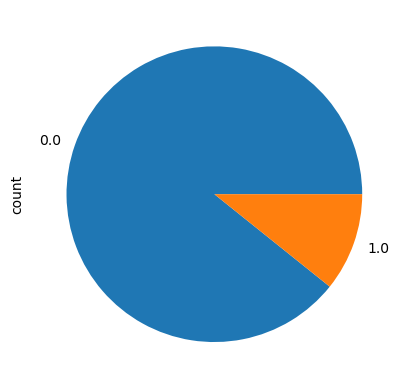

In [191]:
# lets find out churn/non churn percentage
print((telecom_data['churn_probability'].value_counts()/len(telecom_data))*100)
((telecom_data['churn_probability'].value_counts()/len(telecom_data))*100).plot(kind="pie")
plt.show()

### As we can see that 90% of the customers do not churn, there is a possibility of class imbalance

In [192]:
# Selecting all the churn phase columns in order to drop then
churn_phase_cols = [col for col in telecom_data.columns if '_8' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8']


In [193]:
# Dropping the selected churn phase columns
telecom_data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
telecom_data.shape

(21157, 94)

- We can still clean the data by few possible columns relating to the good phase.
- As we derived few columns in the good phase earlier, we can drop those related

In [194]:
telecom_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6'], axis=1, inplace=True)

- We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.
- Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [195]:
# creating a list of column names for each month
mon_6_cols = [col for col in telecom_data.columns if '_6' in col]
mon_7_cols = [col for col in telecom_data.columns if '_7' in col]

In [196]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
telecom_data_corr = telecom_data.corr()
telecom_data_corr.loc[:,:] = np.tril(telecom_data_corr, k=-1)
telecom_data_corr = telecom_data_corr.stack()
telecom_data_corr
telecom_data_corr[(telecom_data_corr > 0.80) | (telecom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_7    arpu_7               0.960107
isd_og_mou_7        isd_og_mou_6         0.940545
sachet_2g_7         total_rech_data_7    0.902647
total_ic_mou_6      loc_ic_mou_6         0.901451
total_ic_mou_7      loc_ic_mou_7         0.888412
std_og_t2t_mou_6    onnet_mou_6          0.858788
loc_ic_mou_6        loc_ic_t2m_mou_6     0.849905
std_og_t2t_mou_7    onnet_mou_7          0.849767
std_og_t2m_mou_7    offnet_mou_7         0.847504
loc_ic_mou_7        loc_ic_t2m_mou_7     0.844102
total_og_mou_7      std_og_mou_7         0.839770
std_ic_mou_6        std_ic_t2m_mou_6     0.837686
std_og_t2m_mou_6    offnet_mou_6         0.831546
total_og_mou_6      std_og_mou_6         0.829444
std_ic_mou_7        std_ic_t2m_mou_7     0.819025
loc_og_t2f_mou_7    loc_og_t2f_mou_6     0.816745
loc_og_mou_7        loc_og_mou_6         0.812588
loc_ic_mou_7        loc_ic_mou_6         0.807378
av_rech_amt_data_7  max_rech_data_7      0.805079
isd_ic_mou_7        isd_ic_mou_6         0.803611


In [197]:
col_to_drop=['total_rech_amt_7', 'isd_og_mou_7', 'sachet_2g_7', 'total_ic_mou_6' , 'total_ic_mou_7' , 
             'std_og_t2t_mou_6']

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
telecom_data.drop(col_to_drop, axis=1, inplace=True)

In [198]:
telecom_data.shape

(21157, 84)

## Deriving new variables to understand the data

In [199]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_data.drop('aon',axis=1, inplace=True)

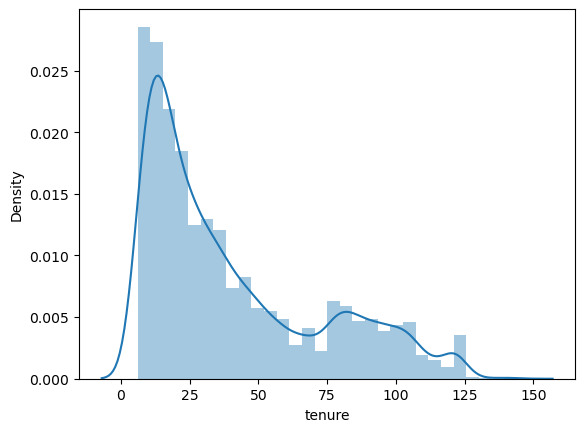

In [200]:
# Checking the distribution of he tenure variable

sns.distplot(telecom_data['tenure'],bins=30)
plt.show()

In [201]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

4         1-2 Yrs
10        1-2 Yrs
12    6-12 Months
14        2-5 Yrs
15        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

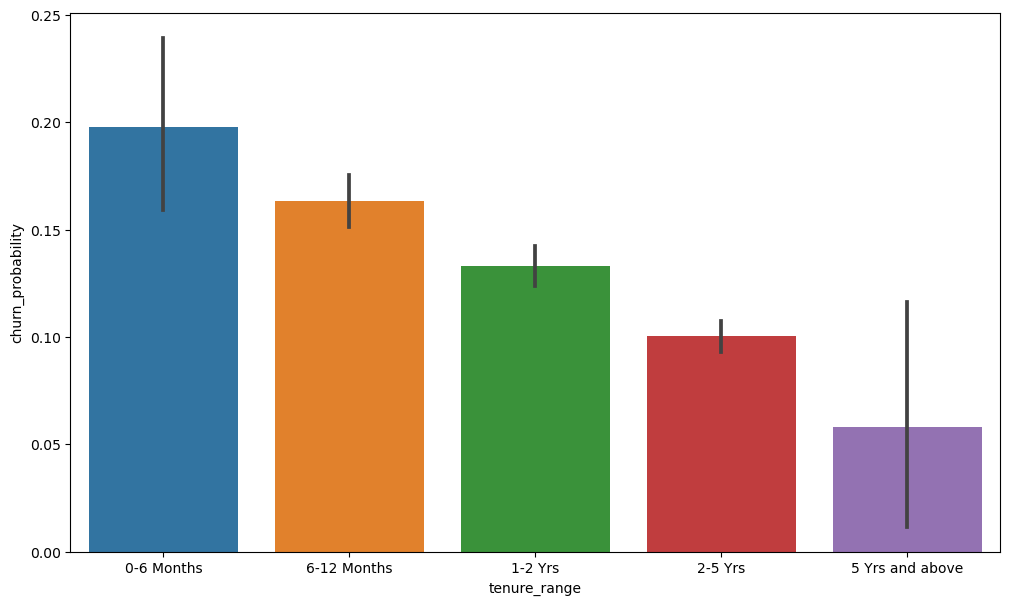

In [202]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=telecom_data)
plt.show()

- It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.
- The average revenue per user is good phase of customer is given by arpu_6.

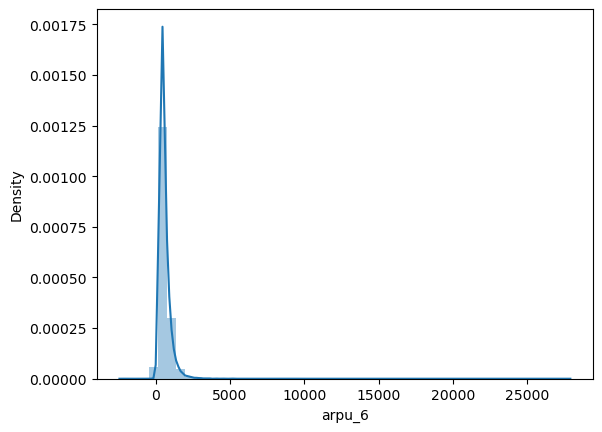

In [203]:
# Visualizing the column created
sns.distplot(telecom_data['arpu_6'])
plt.show()

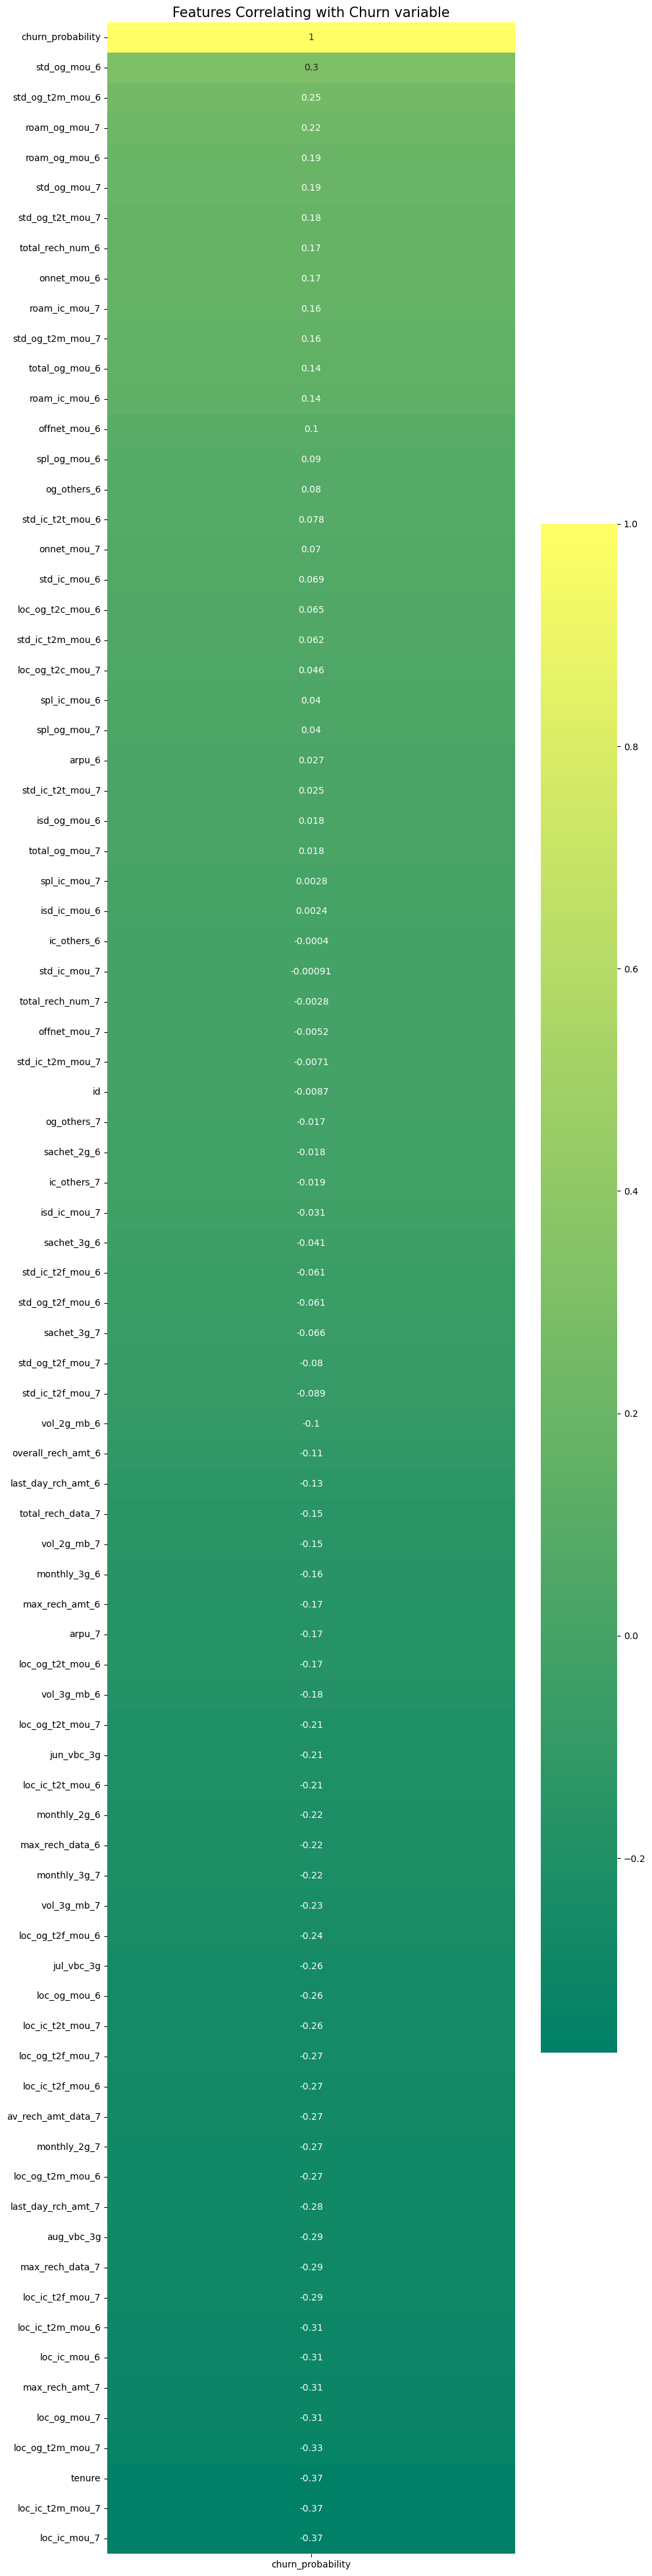

In [204]:
plt.figure(figsize=(10,50))
telecom_data_corr = telecom_data.loc[:, telecom_data.columns != 'tenure_range'].corr()
heatmap_churn = sns.heatmap(telecom_data_corr.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

- creating a scatter plot with total_rech_num_7 and  arpu_7

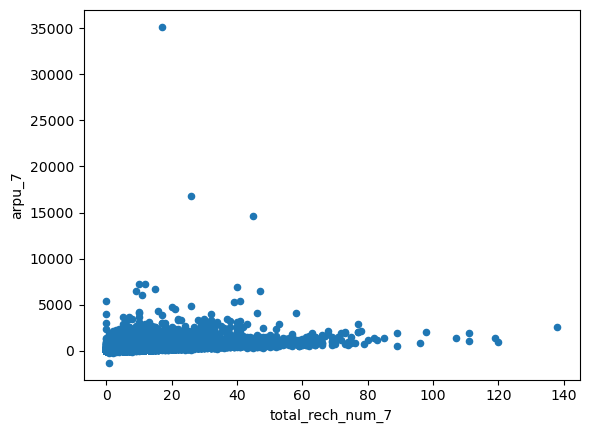

In [205]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
telecom_data[['total_rech_num_7', 'arpu_7']].plot.scatter(x = 'total_rech_num_7',
                                                              y='arpu_7')
plt.show()

- creating a box plot with churn_probability and tenure

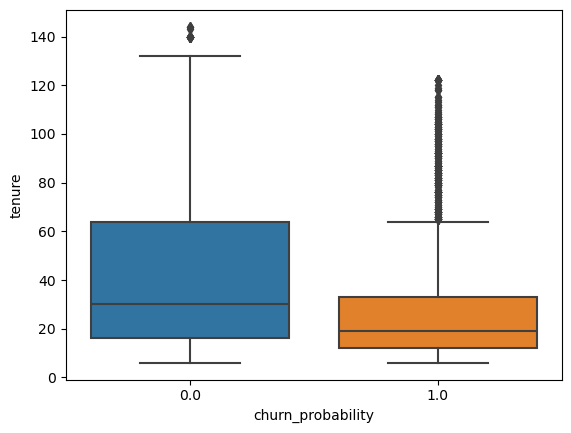

In [206]:
sns.boxplot(x = telecom_data.churn_probability, y = telecom_data.tenure)
plt.show()

- From the above plot , its clear tenured customers do no churn and they keep availing telecom servicesm

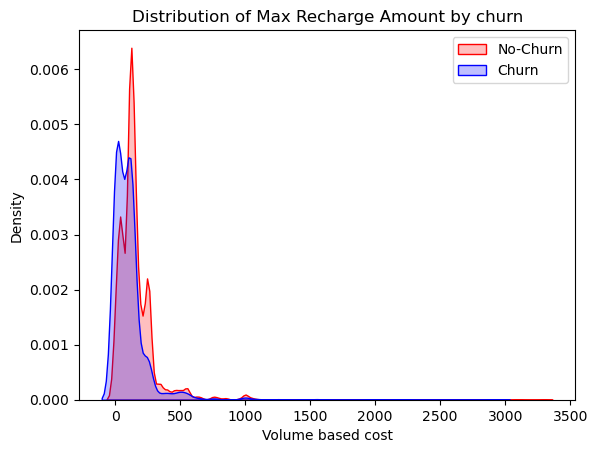

In [207]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_7[(telecom_data["churn_probability"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_7[(telecom_data["churn_probability"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

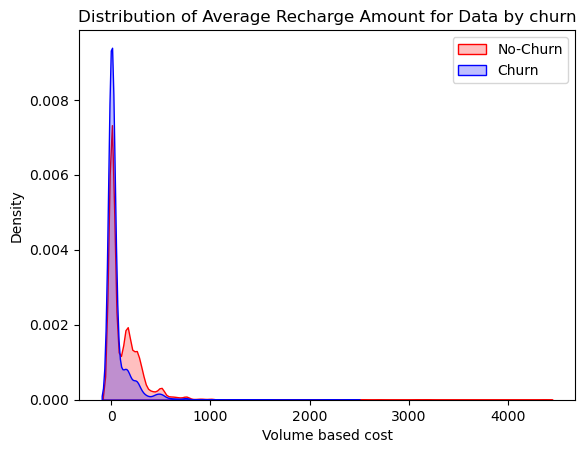

In [208]:
# churn vs avg rechare amount
ax = sns.kdeplot(telecom_data.av_rech_amt_data_7[(telecom_data["churn_probability"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.av_rech_amt_data_7[(telecom_data["churn_probability"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

- Creating categories for month 7 month column totalrecharge and their count

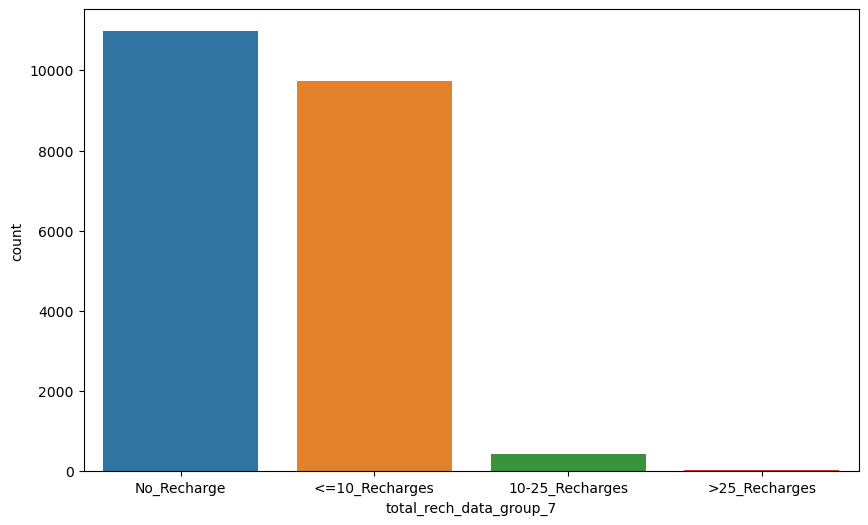

In [209]:
# Plotting the results
telecom_data['total_rech_data_group_7'] = pd.cut(
    telecom_data['total_rech_data_7'],
    bins=[-1, 0, 10, 25, 100],
    labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"]
)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='total_rech_data_group_7', data=telecom_data)
plt.show() 

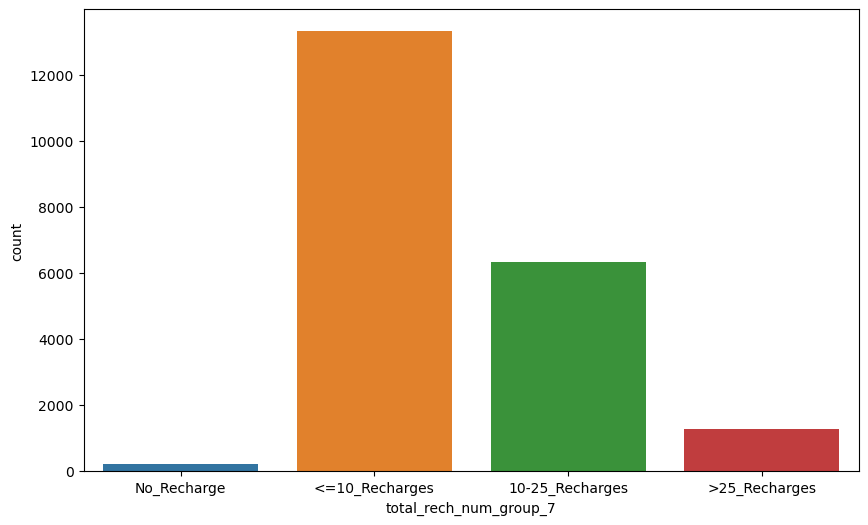

In [210]:
 telecom_data['total_rech_num_group_7'] = pd.cut(
    telecom_data['total_rech_num_7'],
    bins=[-1,0,10,25,1000],
    labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"]
)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='total_rech_num_group_7', data=telecom_data)
plt.show() 


In [211]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_7','total_rech_num_group_7','tenure_range']], drop_first=True, dtype=int)
dummy.head()

,total_rech_data_group_7_<=10_Recharges,total_rech_data_group_7_10-25_Recharges,total_rech_data_group_7_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
4,1,0,0,1,0,0,0,1,0,0
10,0,0,0,1,0,0,0,1,0,0
12,0,0,0,1,0,0,1,0,0,0
14,0,0,0,1,0,0,0,0,1,0
15,0,0,0,1,0,0,0,1,0,0


In [212]:
# Adding the results to the master dataframe
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,overall_rech_amt_6,tenure,tenure_range,total_rech_data_group_7,total_rech_num_group_7,total_rech_data_group_7_<=10_Recharges,total_rech_data_group_7_10-25_Recharges,total_rech_data_group_7_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
4,4.0,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,13.0,10.0,50.0,41.0,25.0,10.0,7.0,25.0,41.0,191.0,390.80,308.89,0.00,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.0,1515.0,22.0,1-2 Yrs,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,1,0,0
10,10.0,445.826,18.310,16.54,0.00,104.81,8.16,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,0.00,0.0,0.0,0.0,0.00,0.00,8.0,3.0,110.0,0.0,98.0,0.0,0.0,98.0,0.0,0.0,6.33,0.00,97.94,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.05,0.0,18.95,0.0,486.0,16.0,1-2 Yrs,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,1,0,0
12,12.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,0.00,0.0,0.0,0.0,0.00,0.00,15.0,10.0,110.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,521.0,11.0,6-12 Months,No_Recharge,<=10_Recharges,0,0,0,1,0,0,1,0,0,0
14,14.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,0.44,0.0,0.0,0.0,3.74,0.46,7.0,3.0,150.0,120.0,110.0,120.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,530.0,35.0,2-5 Yrs,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
15,15.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,0.00,0.0,0.0,0.0,0.00,0.00,5.0,3.0,250.0,250.0,0.0,150.0,0.0,154.0,0.0,0.0,260.42,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,808.0,20.

In [213]:
# Creating a copy of the filtered dataframe
df = telecom_data[:].copy()
# Dropping unwanted columns
df.drop(['tenure_range','total_rech_data_group_7','total_rech_num_group_7','tenure'], axis=1, inplace=True)

In [214]:
# Cheking the dataset
df.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,overall_rech_amt_6,total_rech_data_group_7_<=10_Recharges,total_rech_data_group_7_10-25_Recharges,total_rech_data_group_7_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
4,4.0,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,13.0,10.0,50.0,41.0,25.0,10.0,7.0,25.0,41.0,191.0,390.80,308.89,0.00,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0.0,1515.0,1,0,0,1,0,0,0,1,0,0
10,10.0,445.826,18.310,16.54,0.00,104.81,8.16,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,0.00,0.0,0.0,0.0,0.00,0.00,8.0,3.0,110.0,0.0,98.0,0.0,0.0,98.0,0.0,0.0,6.33,0.00,97.94,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.05,0.0,18.95,0.0,486.0,0,0,0,1,0,0,0,1,0,0
12,12.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,0.00,0.0,0.0,0.0,0.00,0.00,15.0,10.0,110.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,521.0,0,0,0,1,0,0,1,0,0,0
14,14.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,0.44,0.0,0.0,0.0,3.74,0.46,7.0,3.0,150.0,120.0,110.0,120.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,530.0,0,0,0,1,0,0,0,0,1,0
15,15.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,0.00,0.0,0.0,0.0,0.00,0.00,5.0,3.0,250.0,250.0,0.0,150.0,0.0,154.0,0.0,0.0,260.42,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,808.0,0,0,0,1,0,0,0,1,0,0


In [215]:
# lets create X dataset for model building.
X = df.drop(['churn_probability'],axis=1)

In [216]:
X.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,total_rech_data_group_7_<=10_Recharges,total_rech_data_group_7_10-25_Recharges,total_rech_data_group_7_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
4,4.0,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.00,9.85,58.91,25.94,0.00,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.00,17.0,0.00,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,13.0,10.0,50.0,41.0,25.0,10.0,7.0,25.0,41.0,191.0,390.80,308.89,0.00,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,1515.0,1,0,0,1,0,0,0,1,0,0
10,10.0,445.826,18.310,16.54,0.00,104.81,8.16,18.56,0.0,20.30,0.0,16.54,0.00,47.36,1.44,25.98,0.00,0.00,0.00,89.89,1.44,0.00,11.16,6.71,0.0,0.0,11.16,6.71,0.0,0.00,0.0,0.00,0.0,101.06,8.16,17.44,0.00,111.46,2.28,11.78,0.00,140.69,2.28,0.00,0.00,444.79,62.24,0.0,1.53,444.79,63.78,0.00,0.0,0.0,0.0,0.00,0.00,8.0,3.0,110.0,0.0,98.0,0.0,0.0,98.0,0.0,0.0,6.33,0.00,97.94,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.05,0.0,18.95,486.0,0,0,0,1,0,0,0,1,0,0
12,12.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,100.44,527.96,713.98,0.0,0.0,772.43,814.43,0.0,0.00,0.0,0.00,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.0,0.48,7.56,9.13,0.00,0.0,0.0,0.0,0.00,0.00,15.0,10.0,110.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,521.0,0,0,0,1,0,0,1,0,0,0
14,14.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,0.0,0.00,0.0,88.43,78.51,49.48,41.76,1.76,0.00,8.16,0.00,139.68,120.28,37.83,38.63,52.34,0.0,0.0,73.96,90.18,0.0,8.79,0.0,6.23,0.0,228.68,210.46,200.73,149.54,87.36,92.94,1.00,0.41,289.09,242.91,102.34,13.01,19.06,80.34,0.0,0.03,121.41,93.39,0.44,0.0,0.0,0.0,3.74,0.46,7.0,3.0,150.0,120.0,110.0,120.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,530.0,0,0,0,1,0,0,0,0,1,0
15,15.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.08,0.0,0.10,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.0,1.03,0.00,1.03,0.00,0.0,0.0,0.0,0.00,0.00,5.0,3.0,250.0,250.0,0.0,150.0,0.0,154.0,0.0,0.0,260.42,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,808.0,0,0,0,1,0,0,0,1,0,0


In [217]:
# lets create y dataset for model building.
y=df['churn_probability']
y.head()

4     0.0
10    0.0
12    0.0
14    0.0
15    0.0
Name: churn_probability, dtype: float64

In [218]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
X_train.shape, X_test.shape

((14809, 92), (6348, 92))

In [219]:
X_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Index: 14809 entries, 54743 to 748
Data columns (total 92 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   id                                       14809 non-null  float64
 1   arpu_6                                   14809 non-null  float64
 2   arpu_7                                   14809 non-null  float64
 3   onnet_mou_6                              14809 non-null  float64
 4   onnet_mou_7                              14809 non-null  float64
 5   offnet_mou_6                             14809 non-null  float64
 6   offnet_mou_7                             14809 non-null  float64
 7   roam_ic_mou_6                            14809 non-null  float64
 8   roam_ic_mou_7                            14809 non-null  float64
 9   roam_og_mou_6                            14809 non-null  float64
 10  roam_og_mou_7                            14809 no

In [220]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [221]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [222]:
X_train.head()


,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,total_rech_data_group_7_<=10_Recharges,total_rech_data_group_7_10-25_Recharges,total_rech_data_group_7_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
54743,0.782064,0.079346,0.036514,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.001114,0.0,0.0,0.000000,0.000170,0.003341,0.000715,0.006989,0.005126,0.000000,0.000000,0.005588,0.003616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.065089,0.036232,0.003491,0.002728,0.000000,0.002903,0.000000,0.009003,0.000000,0.000000,0.056477,0.000000,0.000000,0.00000,0.00,0.0,0.214286,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.002997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44774,0.639635,0.093001,0.044799,0.008325,0.003491,0.073670,0.040681,0.0,0.0,0.0,0.0,0.009538,0.003816,0.092297,0.066021,0.018799,0.025901,0.013096,0.005108,0.043382,0.035909,0.000028,0.004009,0.001175,0.006571,0.015365,0.003566,0.001813,0.0,0.009412,0.010357,0.0,0.0,0.046666,0.036631,0.009576,0.005468,0.129702,0.165766,0.235218,0.170118,0.101308,0.147362,0.000316,0.000326,0.001738,0.021419,0.022448,0.018643,0.011959,0.018244,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.112426,0.123188,0.062344,0.026069,0.005736,0.003226,0.037037,0.063023,0.016077,0.009622,0.015783,0.003225,0.000000,0.00000,0.00,0.0,0.119048,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015473,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32969,0.470976,0.090587,0.047161,0.000777,0.000000,0.005993,0.000000,0.0,0.0,0.0,0.0,0.000891,0.000000,0.000347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000676,0.000000,0.000000,0.004484,0.000000,0.000000,0.000000,0.003362,0.000000,0.0,0.008512,0.000000,0.0,0.0,0.003853,0.000000,0.001148,0.000000,0.000271,0.000043,0.000000,0.000000,0.000813,0.000027,0.000000,0.000000,0.000036,0.000000,0.000000,0.000000,0.000036,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.047337,0.028986,0.062843,0.076387,0.007481,0.081290,0.037037,0.162058,0.162058,0.115464,0.009445,0.001669,0.015990,0.04699,0.00,0.0,0.000000,0.111111,0.142857,0.068966,0.0,0.069338,0.054598,0.031764,0.008146,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6843,0.097710,0.083859,0.038191,0.006058,0.005144,0.055755,0.026856,0.0,0.0,0.0,0.0,0.005856,0.005512,0.048404,0.042189,0.007432,0.014087,0.000000,0.000000,0.023126,0.025718,0.000143,0.001024,0.000042,0.005616,0.000000,0.002178,0.000177,0.0,0.108932,0.019071,0.0,0.0,0.035033,0.026912,0.009290,0.042118,0.061133,0.074896,0.099695,0.076

## Data Imbalance Handling

In [223]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [224]:
X_train_sm.shape, y_train_sm.shape

((26504, 92), (26504,))

## Logistic Regression

In [225]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26504
Model:                            GLM   Df Residuals:                    26411
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13458.
Date:                Fri, 07 Jun 2024   Deviance:                       26915.
Time:                        18:44:37   Pearson chi2:                 2.12e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3098
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1520      0.257      0.592      0.554      -0.351       0.655
id                                          0.0436      0.053      0.820      0.412      -0.061       0.148
arpu_6                                     15.4734      3.257      4.751      0.000       9.090      21.857
arpu_7                                     -3.4858      4.095     -0.851      0.395     -11.512       4.540
onnet_mou_6                              -190.1201     29.376     -6.472      0.000    -247.697    -132.544
onnet_mou_7                               135.8164     14.334      9.475      0.000     107.722     163.911
offnet_mou_6                             -149.1064     23.300     -6.400      0.000    -194.773    -103.440
offnet_mou_7                               97.8662     10.958      8.931      0.000      76.389     119.344
roam_ic_mou_6                               2.4816      0.980      2.533      0.011       0.562       4.402
roam_ic_mou_7                              -1.4964      0.989     -1.513      0.130      -3.435       0.442
roam_og_mou_6                              95.4342     14.932      6.391      0.000      66.167     124.701
roam_og_mou_7                             -38.8489      4.620     -8.408      0.000     -47.904     -29.793
loc_og_t2t_mou_6                        -7184.9612   1.87e+04     -0.384      0.701   -4.39e+04    2.95e+04
loc_og_t2t_mou_7                         1.505e+05    2.2e+04      6.853      0.000    1.07e+05    1.94e+05
loc_og_t2m_mou_6                        -4705.8104   1.23e+04     -0.384      0.701   -2.87e+04    1.93e+04
loc_og_t2m_mou_7                         7.138e+04   1.04e+04      6.854      0.000     5.1e+04    9.18e+04
loc_og_t2f_mou_6                         -689.0904   1797.362     -0.383      0.701   -4211.855    2833.674
loc_og_t2f_mou_7                         1.226e+04   1788.534      6.852      0.000    8749.967    1.58e+04
loc_og_t2c_mou_6                           -2.4438      0.908     -2.692      0.007      -4.223      -0.664
loc_og_t2c_mou_7                            4.3868      1.732      2.533      0.011       0.993       7.781
loc_og_mou_6                              1.22e+04    3.1e+04      0.394      0.694   -4.85e+04    7.29e+04
loc_og_mou_7                            -1.561e+05   2.28e+04     -6.854      0.000   -2.01e+05   -1.11e+05
std_og_t2t_mou_7                        -4.047e+04   3.02e+04     -1.339      0.181   -9.97e+04    1.88e+04
std_og_t2m_mou_6                           -1.8180      3.257     -0.558      0.577      -8.202       4.566
std_og_t2m_mou_7                        -3.294e+04   2.46e+04     -1.338      0.181   -8.12e+04    1.53e+04
std_og_t2f_mou_6                           -5.3092      1.5

## Logistic Regression using Feature Selection (RFE method)

In [226]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train, y_train)

In [227]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [228]:
rfe_columns=X_train_sm.columns[rfe.support_]
rfe_columns

Index(['arpu_6', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2m_mou_7', 'loc_og_mou_7', 'std_og_mou_6', 'total_og_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_7', 'monthly_2g_7', 'monthly_3g_7', 'aug_vbc_3g', 'jul_vbc_3g'], dtype='object')

In [229]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', False, 72),
 ('arpu_6', True, 1),
 ('arpu_7', False, 25),
 ('onnet_mou_6', False, 7),
 ('onnet_mou_7', False, 46),
 ('offnet_mou_6', False, 5),
 ('offnet_mou_7', False, 4),
 ('roam_ic_mou_6', False, 3),
 ('roam_ic_mou_7', False, 65),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('loc_og_t2t_mou_6', False, 47),
 ('loc_og_t2t_mou_7', False, 21),
 ('loc_og_t2m_mou_6', False, 61),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', False, 44),
 ('loc_og_t2f_mou_7', False, 2),
 ('loc_og_t2c_mou_6', False, 66),
 ('loc_og_t2c_mou_7', False, 40),
 ('loc_og_mou_6', False, 52),
 ('loc_og_mou_7', True, 1),
 ('std_og_t2t_mou_7', False, 15),
 ('std_og_t2m_mou_6', False, 16),
 ('std_og_t2m_mou_7', False, 41),
 ('std_og_t2f_mou_6', False, 22),
 ('std_og_t2f_mou_7', False, 24),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_7', False, 54),
 ('isd_og_mou_6', False, 39),
 ('spl_og_mou_6', False, 60),
 ('spl_og_mou_7', False, 67),
 ('og_others_6', False, 59),
 ('og_others_7', False, 69

##### Assessing the model with StatsModels

In [230]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26504
Model:                            GLM   Df Residuals:                    26483
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14542.
Date:                Fri, 07 Jun 2024   Deviance:                       29085.
Time:                        18:44:45   Pearson chi2:                 3.67e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2509
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2860      0.120     -2.385      0.017      -0.521      -0.051
arpu_6                12.0963      1.501      8.059      0.000       9.154      15.038
roam_og_mou_6          1.7933      0.629      2.852      0.004       0.561       3.026
roam_og_mou_7          4.7058      0.638      7.373      0.000       3.455       5.957
loc_og_t2m_mou_7      -2.1347      0.785     -2.720      0.007      -3.673      -0.596
loc_og_mou_7          -4.8828      1.208     -4.042      0.000      -7.250      -2.515
std_og_mou_6           4.7336      0.354     13.386      0.000       4.041       5.427
total_og_mou_7        -4.1852      0.411    -10.193      0.000      -4.990      -3.380
loc_ic_t2m_mou_6       3.5422      0.551      6.425      0.000       2.462       4.623
loc_ic_t2m_mou_7      -2.6951      1.113     -2.422      0.015      -4.876      -0.514
loc_ic_t2f_mou_7      -6.7951      1.099     -6.185      0.000      -8.948      -4.642
loc_ic_mou_7          -7.9097      1.227     -6.448      0.000     -10.314      -5.505
total_rech_num_6       2.1451      0.456      4.699      0.000       1.250       3.040
total_rech_num_7      -4.3857      0.404    -10.865      0.000      -5.177      -3.595
max_rech_amt_6         2.9776      0.488      6.107      0.000       2.022       3.933
max_rech_amt_7        -4.8959      0.570     -8.588      0.000      -6.013      -3.779
last_day_rch_amt_7    -7.4047      0.671    -11.035      0.000      -8.720      -6.090
monthly_2g_7          -4.6695      0.307    -15.190      0.000      -5.272      -4.067
monthly_3g_7          -0.7679      0.526     -1.461      0.144      -1.798       0.263
aug_vbc_3g           -44.3228      1.902    -23.303      0.000     -48.051     -40.595
jul_vbc_3g             6.5614      0.765      8.579      0.000       5.062       8.060
======================================================================================
"""

In [231]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.64832236, 0.10086999, 0.05663904, 0.29357559, 0.06833943,
       0.63369828, 0.31258328, 0.47328314, 0.28162281, 0.59640908])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [232]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,1.0,0.648322
1,0.0,0.100870
2,0.0,0.056639
3,0.0,0.293576
4,0.0,0.068339


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [233]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,1.0,0.648322,1
1,0.0,0.100870,0
2,0.0,0.056639,0
3,0.0,0.293576,0
4,0.0,0.068339,0


In [234]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[ 8906  4346]
 [ 2730 10522]]


| Attempt/Predicted | not_churn | churn |
| :---: | :---: | :---: 
| not_churn | 8906 | 4346 |
| churn | 2730 | 10522 |

In [235]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.7330214307274374


#### Checking VIFs

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_6,8.17
8,loc_ic_t2m_mou_7,7.78
10,loc_ic_mou_7,6.73
11,total_rech_num_6,6.61
6,total_og_mou_7,6.41
12,total_rech_num_7,5.92
5,std_og_mou_6,4.80
4,loc_og_mou_7,4.69
14,max_rech_amt_7,4.13
3,loc_og_t2m_mou_7,4.00


### Metrics beyond simply accuracy

In [237]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [238]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.7939933594929067
Specificity =  0.672049501961968
False Positive Rate =  0.327950498038032
Precision =  0.7076943771859026
True Negative Prediction Rate =  0.7653832932279133


### Plotting the ROC Curve

In [239]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [240]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

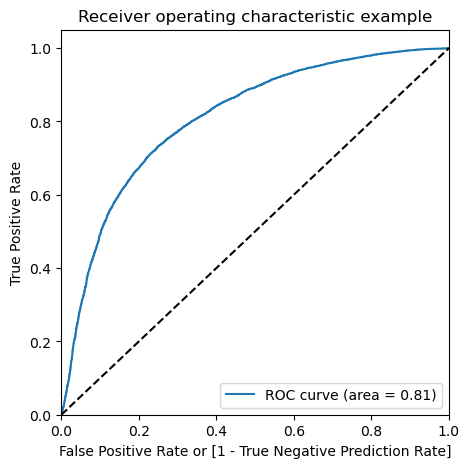

In [241]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [242]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.648322,1,1,1,1,1,1,1,1,0,0,0
1,0.0,0.100870,0,1,1,0,0,0,0,0,0,0,0
2,0.0,0.056639,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.293576,0,1,1,1,0,0,0,0,0,0,0
4,0.0,0.068339,0,1,0,0,0,0,0,0,0,0,0


In [243]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)


     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.583346     0.983399     0.183293
0.2          0.2  0.628207     0.961817     0.294597
0.3          0.3  0.670653     0.930124     0.411183
0.4          0.4  0.705478     0.880169     0.530788
0.5          0.5  0.733021     0.793993     0.672050
0.6          0.6  0.734644     0.653637     0.815650
0.7          0.7  0.670540     0.419861     0.921219
0.8          0.8  0.573574     0.176351     0.970797
0.9          0.9  0.509848     0.026034     0.993661


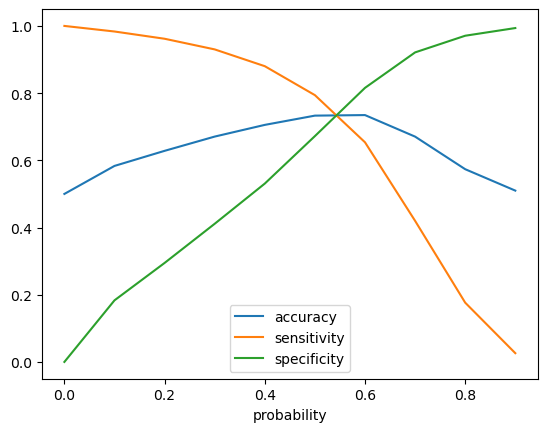

In [244]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range

In [245]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,1.0,0.648322,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
1,0.0,0.100870,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.056639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.293576,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.068339,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [246]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.733021     0.793993     0.672050
0.51         0.51  0.735021     0.783429     0.686613
0.52         0.52  0.736002     0.771582     0.700423
0.53         0.53  0.738304     0.760338     0.716269
0.54         0.54  0.739700     0.749170     0.730229
0.55         0.55  0.740605     0.736191     0.745020
0.56         0.56  0.740530     0.722608     0.758452
0.57         0.57  0.740530     0.707365     0.773695
0.58         0.58  0.738228     0.688651     0.787806
0.59         0.59  0.736266     0.670842     0.801690


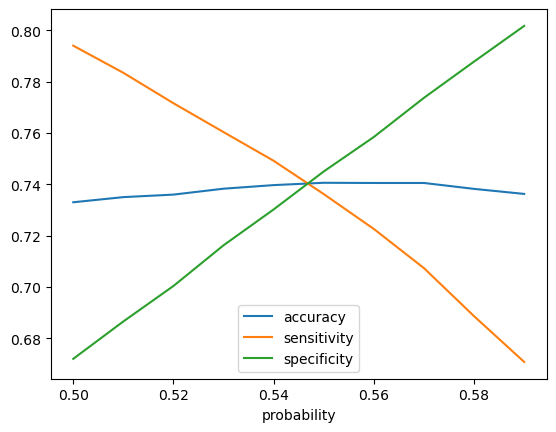

In [247]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [248]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,1.0,0.648322,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
1,0.0,0.100870,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.056639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.293576,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.068339,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [249]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.7396996679746454


In [250]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[9677 3575]
 [3324 9928]]


In [251]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.7491699366133414
Specificity =  0.7302293993359493
False Positive Rate =  0.26977060066405073
Precision =  0.7352440198474413
True Negative Prediction Rate =  0.7443273594338897


## Precision and recall tradeoff

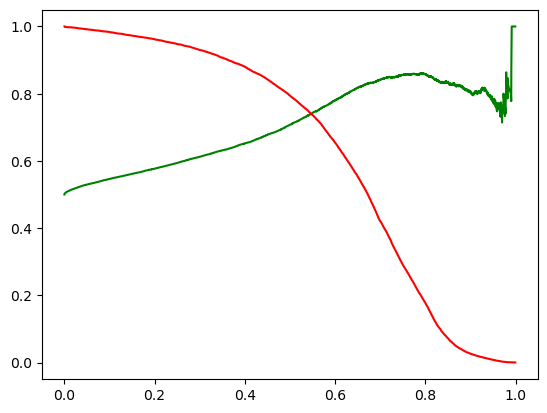

In [252]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [253]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,total_rech_data_group_7_<=10_Recharges,total_rech_data_group_7_10-25_Recharges,total_rech_data_group_7_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
27205,0.388625,0.089515,0.046094,0.000000,0.000506,0.053057,0.053117,0.0,0.0,0.0,0.000000,0.000000,0.000558,0.074325,0.101998,0.000000,0.000000,0.000000,0.000000,0.029414,0.047186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000244,0.000000,0.000000,0.0,0.029353,0.043707,0.003456,0.002815,0.020310,0.031799,0.013597,0.004099,0.014217,0.022397,0.000000,0.000179,0.000000,0.000000,0.008075,0.025377,0.003566,0.006844,0.444444,0.028571,0.000000,0.000000,0.0,0.000588,0.195266,0.159420,0.007481,0.015156,0.004988,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000070,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
17229,0.246096,0.094782,0.058326,0.003291,0.007788,0.024018,0.029553,0.0,0.0,0.0,0.000000,0.003387,0.008409,0.024895,0.047431,0.001473,0.002157,0.000000,0.000000,0.011985,0.029970,0.000000,0.006573,0.004939,0.000000,0.000000,0.005140,0.004011,0.000000,0.001652,0.003579,0.002230,0.0,0.015850,0.032256,0.006602,0.011459,0.021443,0.031621,0.010184,0.007389,0.016236,0.028565,0.002669,0.010894,0.010012,0.003705,0.000799,0.003090,0.012969,0.013741,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.076923,0.152174,0.027431,0.021219,0.012469,0.022581,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.002858,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21611,0.308702,0.081724,0.035370,0.000000,0.000847,0.000769,0.002709,0.0,0.0,0.0,0.002576,0.000000,0.000436,0.000743,0.000803,0.000000,0.000000,0.004112,0.001568,0.000294,0.000789,0.000452,0.000000,0.001180,0.000000,0.000000,0.000000,0.001409,0.000000,0.025400,0.001106,0.003870,0.0,0.002950,0.000000,0.000000,0.000487,0.000000,0.004410,0.000000,0.000000,0.000000,0.003028,0.000000,0.000394,0.000000,0.001738,0.000000,0.004829,0.000000,0.002713,0.166667,0.005238,0.000000,0.000000,0.0,0.000000,0.082840,0.014493,0.012469,0.000000,0.000000,0.000000,0.0,0.026367,0.0,0.0,0.01106,0.0,0.032321,0.0,0.0,0.0,0.095238,0.0,0.0,0.137931,0.0,0.0,0.0,0.014248,0.020143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44319,0.633135,0.088718,0.048876,0.059567,0.078567,0.059382,0.028454,0.0,0.0,0.0,0.000000,0.002598,0.002281,0.031040,0.046451,0.000000,0.000913,0.000000,0.000000,0.013855,0.023516,0.076723,0.039112,0.004255,0.000000,0.000000,0.085704,0.079974,0.000000,0.000000,0.000000,0.000000,0.0,0.074019,0.100500,0.002809,0.002363,0.027573,0.053461,0.000000,0.000000,0.015975,0.034467,0.000099,0.000637,0.00129

In [254]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_6,roam_og_mou_6,roam_og_mou_7,loc_og_t2m_mou_7,loc_og_mou_7,std_og_mou_6,total_og_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_7,monthly_2g_7,monthly_3g_7,aug_vbc_3g,jul_vbc_3g
27205,0.089515,0.0,0.000000,0.101998,0.047186,0.000000,0.043707,0.020310,0.031799,0.004099,0.022397,0.195266,0.159420,0.007481,0.015156,0.000000,0.0,0.0,0.0,0.0
17229,0.094782,0.0,0.000000,0.047431,0.029970,0.005140,0.032256,0.021443,0.031621,0.007389,0.028565,0.076923,0.152174,0.027431,0.021219,0.022581,0.0,0.0,0.0,0.0
21611,0.081724,0.0,0.002576,0.000803,0.000789,0.000000,0.000000,0.000000,0.004410,0.000000,0.003028,0.082840,0.014493,0.012469,0.000000,0.000000,0.0,0.0,0.0,0.0
44319,0.088718,0.0,0.000000,0.046451,0.023516,0.085704,0.100500,0.027573,0.053461,0.000000,0.034467,0.035503,0.043478,0.031920,0.033343,0.035484,0.0,0.0,0.0,0.0
29784,0.085909,0.0,0.000000,0.045921,0.031544,0.001239,0.030753,0.047733,0.066197,0.094302,0.070460,0.029586,0.050725,0.062344,0.039406,0.041935,0.0,0.0,0.0,0.0


In [255]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [256]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 27205    0.404861
17229    0.383445
21611    0.695197
44319    0.448615
29784    0.213163
5368     0.598973
8023     0.284702
33213    0.326183
69483    0.416917
40241    0.214865
dtype: float64


In [257]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
27205,0.404861
17229,0.383445
21611,0.695197
44319,0.448615
29784,0.213163


In [258]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [259]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
27205,0.0
17229,0.0
21611,0.0
44319,0.0
29784,0.0


In [260]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
27205,0.0,0.404861
17229,0.0,0.383445
21611,0.0,0.695197
44319,0.0,0.448615
29784,0.0,0.213163


In [261]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
27205,0.0,0.404861,0
17229,0.0,0.383445,0
21611,0.0,0.695197,1
44319,0.0,0.448615,0
29784,0.0,0.213163,0


In [262]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.718336483931947

### Metrics Evaluation

In [263]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[4061 1569]
 [ 219  499]]


In [264]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [265]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.6949860724233984
Specificity =  0.7213143872113676
False Positive Rate =  0.27868561278863235
Precision =  0.24129593810444874
True Negative Prediction Rate =  0.9488317757009346


### Explaining the results

In [266]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  72.0 %
The sensitivity of the predicted model is:  69.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



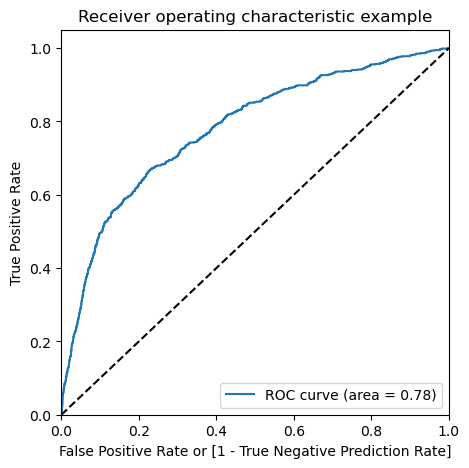

In [267]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

- The AUC score of 0.81 for the training dataset and 0.78 for the testing dataset indicates that this model can be deemed effective.

# Logistic Regression using PCA

In [268]:
# split the dateset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (14809, 92)
Dimension of X_test: (6348, 92)
Dimension of X_train_sm Shape: (26504, 92)
Dimension of y_train_sm Shape: (26504,)


,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_7,max_rech_data_6,max_rech_data_7,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,total_rech_data_group_7_<=10_Recharges,total_rech_data_group_7_10-25_Recharges,total_rech_data_group_7_>25_Recharges,total_rech_num_group_7_<=10_Recharges,total_rech_num_group_7_10-25_Recharges,total_rech_num_group_7_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.782064,0.079346,0.036514,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.001114,0.0,0.0,0.000000,0.000170,0.003341,0.000715,0.006989,0.005126,0.000000,0.000000,0.005588,0.003616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.065089,0.036232,0.003491,0.002728,0.000000,0.002903,0.000000,0.009003,0.000000,0.000000,0.056477,0.000000,0.000000,0.00000,0.00,0.0,0.214286,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.002997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.639635,0.093001,0.044799,0.008325,0.003491,0.073670,0.040681,0.0,0.0,0.0,0.0,0.009538,0.003816,0.092297,0.066021,0.018799,0.025901,0.013096,0.005108,0.043382,0.035909,0.000028,0.004009,0.001175,0.006571,0.015365,0.003566,0.001813,0.0,0.009412,0.010357,0.0,0.0,0.046666,0.036631,0.009576,0.005468,0.129702,0.165766,0.235218,0.170118,0.101308,0.147362,0.000316,0.000326,0.001738,0.021419,0.022448,0.018643,0.011959,0.018244,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.112426,0.123188,0.062344,0.026069,0.005736,0.003226,0.037037,0.063023,0.016077,0.009622,0.015783,0.003225,0.000000,0.00000,0.00,0.0,0.119048,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.015473,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.470976,0.090587,0.047161,0.000777,0.000000,0.005993,0.000000,0.0,0.0,0.0,0.0,0.000891,0.000000,0.000347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000676,0.000000,0.000000,0.004484,0.000000,0.000000,0.000000,0.003362,0.000000,0.0,0.008512,0.000000,0.0,0.0,0.003853,0.000000,0.001148,0.000000,0.000271,0.000043,0.000000,0.000000,0.000813,0.000027,0.000000,0.000000,0.000036,0.000000,0.000000,0.000000,0.000036,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.047337,0.028986,0.062843,0.076387,0.007481,0.081290,0.037037,0.162058,0.162058,0.115464,0.009445,0.001669,0.015990,0.04699,0.00,0.0,0.000000,0.111111,0.142857,0.068966,0.0,0.069338,0.054598,0.031764,0.008146,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.097710,0.083859,0.038191,0.006058,0.005144,0.055755,0.026856,0.0,0.0,0.0,0.0,0.005856,0.005512,0.048404,0.042189,0.007432,0.014087,0.000000,0.000000,0.023126,0.025718,0.000143,0.001024,0.000042,0.005616,0.000000,0.002178,0.000177,0.0,0.108932,0.019071,0.0,0.0,0.035033,0.026912,0.009290,0.042118,0.061133,0.074896,0.099695,0.076710,0.049203,0.

In [269]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [270]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (26504, 92)
Dimension of X_test_pca:  (6348, 92)


In [271]:
#Viewing the PCA components
pca.components_

array([[ 3.22232242e-03,  3.35252692e-03,  6.64886720e-03, ...,
         8.02453345e-02,  3.97202359e-02, -6.58070527e-04],
       [ 1.14410610e-02,  9.86579508e-04,  1.32389807e-03, ...,
        -6.66349362e-01,  7.42122743e-01, -1.93686937e-04],
       [-1.35685243e-02, -3.40134697e-03,  1.08904442e-03, ...,
        -2.53170235e-01, -2.01109192e-01,  7.27519638e-04],
       ...,
       [ 3.53489350e-08,  1.01836467e-06,  1.35377753e-06, ...,
        -8.12107792e-08, -4.89494640e-08,  9.83412883e-08],
       [-2.29011527e-08,  2.57132503e-06, -1.40819399e-06, ...,
        -2.78885419e-08, -8.16551954e-09, -2.66406988e-08],
       [ 7.73656211e-10, -2.15973978e-07,  6.32231401e-07, ...,
         2.15001875e-08,  2.18176189e-08, -6.38023037e-10]])

### Performing Logistic Regression

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (6348, 1)


In [273]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[4016 1614]
 [ 205  513]] 

Accuracy of the logistic regression model with PCA:  0.7134530560806553


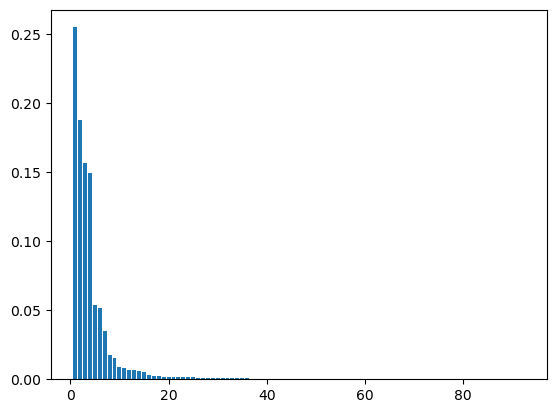

In [274]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

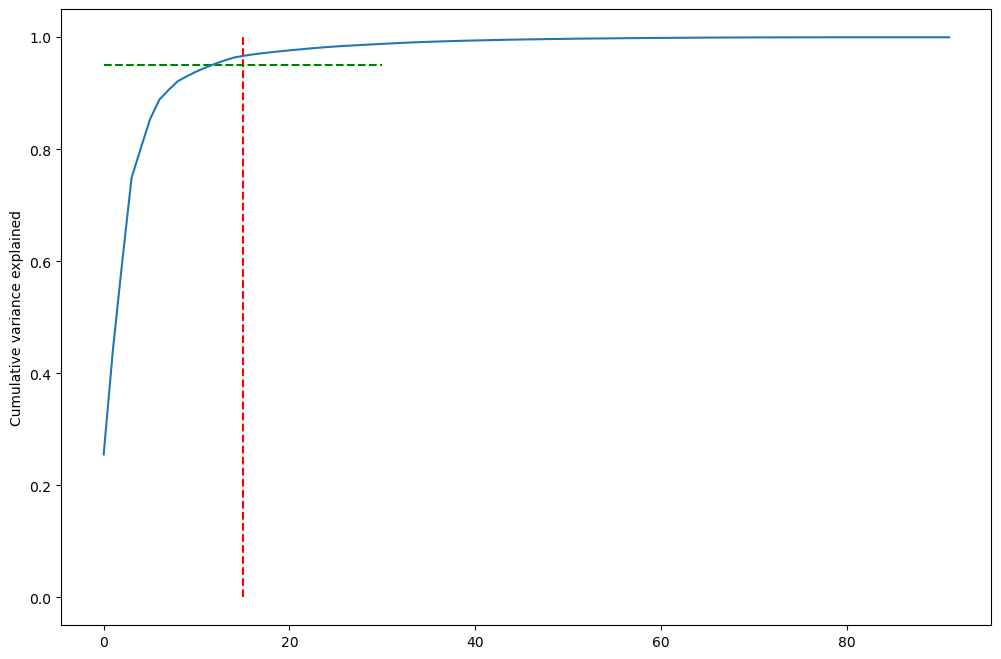

In [275]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [276]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([25.5, 44.3, 59.9, 74.8, 80.1, 85.3, 88.8, 90.5, 92.1, 93. , 93.8,
       94.5, 95.1, 95.7, 96.2, 96.5, 96.7, 96.9, 97.1, 97.3, 97.5, 97.7,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4, 99.4,
       99.4, 99.4, 99.4, 99.4])

- More than 95% of the data can be explained with 18 PCA components
- Fitting the dataset with the 20 explainable components

In [277]:
pca_20 = PCA(n_components=18)

train_pca_20 = pca_20.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_20.shape)

test_pca_20 = pca_20.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_20.shape)

Dimension for Train dataset using PCA:  (26504, 18)
Dimension for Test dataset using PCA:  (6348, 18)


In [278]:
logreg_pca_20 = LogisticRegression()
logreg_pca_20.fit(train_pca_20, y_train_sm)

# making the predictions
y_pred_20 = logreg_pca_20.predict(test_pca_20)

# converting the prediction into a dataframe
y_pred_df_20 = pd.DataFrame(y_pred_20)
print("Dimension of y_pred_df_20: ", y_pred_df_20.shape)

Dimension of y_pred_df_20:  (6348, 1)


In [279]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_20),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_20))

Confusion Matirx for y_test & y_pred
 [[3915 1715]
 [ 219  499]] 

Accuracy of the logistic regression model with PCA:  0.6953371140516699


# Decision Tree with PCA

In [280]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [281]:
dt = DecisionTreeClassifier(random_state=42)

In [282]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [283]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [284]:
grid_search.fit(X_train_sm_pca, y_train_sm)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [285]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.696175,0.012038,0.006939,0.001348,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.662089,0.671899,0.679746,0.672351,0.671521,0.006274,61
1,0.702543,0.002718,0.005472,0.001265,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.662089,0.671899,0.679746,0.672351,0.671521,0.006274,61
2,0.700964,0.006382,0.004510,0.000346,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.662089,0.671899,0.679746,0.672351,0.671521,0.006274,61
3,0.694862,0.003136,0.006336,0.001028,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.662089,0.671899,0.679746,0.672351,0.671521,0.006274,61
4,0.695371,0.003824,0.004383,0.000780,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.662089,0.671899,0.679746,0.672351,0.671521,0.006274,61


In [286]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
60,5.796685,0.070224,0.005765,0.000669,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_...",0.777392,0.796710,0.787353,0.792333,0.788447,0.007190,1
62,4.558729,0.053668,0.007648,0.002048,20,5,50,"{'max_depth': 20, 'min_samples_leaf': 5, 'min_...",0.777392,0.796710,0.787353,0.792333,0.788447,0.007190,1
63,4.462586,0.073347,0.005697,0.000579,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min...",0.778147,0.784636,0.785693,0.789768,0.784561,0.004169,3
65,4.454357,0.032112,0.005383,0.000172,20,10,50,"{'max_depth': 20, 'min_samples_leaf': 10, 'min...",0.778147,0.784636,0.785693,0.789768,0.784561,0.004169,3
66,3.849225,0.026901,0.005258,0.000130,20,20,50,"{'max_depth': 20, 'min_samples_leaf': 20, 'min...",0.779203,0.781920,0.781467,0.783731,0.781580,0.001613,5


In [287]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [288]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=20, 
                                  min_samples_leaf=5,
                                  min_samples_split=50)

In [289]:
dt_best.fit(X_train_sm_pca, y_train_sm)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

In [290]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_sm, dt_classifier.predict(X_train_sm_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_sm, dt_classifier.predict(X_train_sm_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test_pca)))

In [291]:
evaluate_model(dt_best)

Train Accuracy : 0.896581648053124
Train Confusion Matrix:
[[11900  1352]
 [ 1389 11863]]
--------------------------------------------------
Test Accuracy : 0.7698487712665406
Test Confusion Matrix:
[[4571 1059]
 [ 402  316]]


## Random Forest with PCA

In [292]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [293]:
rf.fit(X_train_sm_pca, y_train_sm)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [294]:
rf.oob_score_

0.6884243887715061

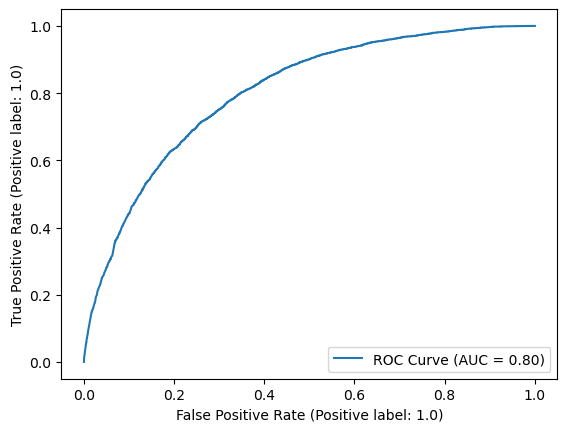

In [295]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_train_sm_pca, y_train_sm, name="ROC Curve")

### Hyper-parameter tuning for the Random Forest

In [296]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [297]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [298]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(X_train_sm_pca, y_train_sm)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [ ]:
rfc_model.fit(X_train_sm_pca, y_train_sm)

In [ ]:
evaluate_model(rfc_model)

### Conclusion
- The model accuracy are below, Decision Tree with PCA performs better than other model

### Logistic regression 
- train : ~73%
- test  : ~72%  

### Logistic Regression using PCA 
- train : ~71%
- test  : ~69%

### Decision Tree using PCA 
- train : ~89%
- test  : ~76%

### Random Forest with PCA 
- train : ~75%
- test  : ~71%

### Creating submission file
- For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability